In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import scipy.stats as stats
import random
from numpy import polyfit, poly1d

In [2]:
files = os.listdir('physics pubs')
TP = {}
for k in files:
    try:
        with open('physics pubs/'+k,'rb')as f:
            tp = pickle.load(f)
        for i in tp:
            TP[i] = tp[i]
    except:
        print(k)
pub_chemistry0 = TP
print(len(pub_chemistry0))

.DS_Store
22500


In [3]:
#将生涯长度为0的做调整
pub_chemistry = {}
empty=[]
nopa = []
for k in pub_chemistry0:
    tp = pub_chemistry0[k]
    if len(tp)>0:
        cl = tp[2]
        if cl==1:
            empty.append(k)
            tp[3] = tp[0]  # 0总发文量
            tp[6] = tp[5]  # 5总引用
            tp[9] = tp[8]  # 8总合作者数
        else:
            tp = tp
    else:
        nopa.append(k)
        tp = tp
    pub_chemistry[k] = tp

In [4]:
colla = {}
for k in pub_chemistry:
    try:
        colla[k] = pub_chemistry[k][-1]
    except:
        a = 'nt'

In [5]:
print(len(colla))

15722


In [26]:
# colla

In [6]:
mto_mte_colla = []
for k in colla:
    tp = colla[k]
    if len(tp)>0:
        temp = []
        for k1 in tp:
            temp = [k,tp[k1][0],k1,tp[k1][1]]
            mto_mte_colla.append(temp)
    else:
        a = 'nt'

In [7]:
len(mto_mte_colla)

38203

In [8]:
mto_mte_colla_df = pd.DataFrame(mto_mte_colla,columns=['Mentor','PubsOfMentorInTraning','Mentee','CollaPubsOfWithMentor'])

In [9]:
mto_mte_colla_df.head(1)

,Mentor,PubsOfMentorInTraning,Mentee,CollaPubsOfWithMentor
0,715714,24,717033,0


In [10]:
mto_mte_colla_df.to_csv('physics_colla_info.csv',index=0)

In [28]:
neuro = pd.read_csv('physics_1224.csv')

In [32]:
MTO = np.array(neuro.MentorID)
# 在进行退出率的相关计算时，以所有的学生数为参考
TP = []
for k in neuro.MenteeID:
    if k in MTO:
        TP.append(1)
    else:
        TP.append(0)
neuro['Survival0'] = TP              
# neuro = neuro[neuro.StopYear<2000]

In [33]:
neuro.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'CID', 'MenteeID', 'MentorID',
       'MentorshipType', 'Institution', 'InstitutionMAGID', 'StartYear',
       'StopYear', 'NumOfMenteesOfTheMentor', 'NumOfMenteesOfTheMentor10',
       'NumOfMenteesOfTheMenteeIn20', 'BigOrSmall', 'Survival0'],
      dtype='object')

In [41]:
neuro_19601995 = neuro[(neuro['StopYear']>=1960)&(neuro['StopYear']<=1995)]
BigGroup = neuro_19601995.MenteeID[neuro_19601995.BigOrSmall==1]
SmallGroup = neuro_19601995.MenteeID[neuro_19601995.BigOrSmall==0]
Survival_Mentee = neuro_19601995.MenteeID[neuro_19601995.Survival0==1]
Dropout_Mentee = neuro_19601995.MenteeID[neuro_19601995.Survival0==0]

In [42]:
tp_sv = mto_mte_colla_df.CollaPubsOfWithMentor[mto_mte_colla_df.Mentee.isin(Survival_Mentee)]
tp_dp = mto_mte_colla_df.CollaPubsOfWithMentor[mto_mte_colla_df.Mentee.isin(Dropout_Mentee)]

In [45]:
print(np.median(tp_sv))
print(np.median(tp_dp))

1.0
0.0


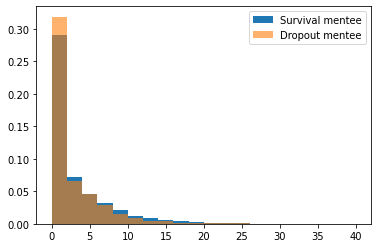

In [48]:
plt.hist(tp_sv,label='Survival mentee',range=[0,40],bins=20,density=1)
plt.hist(tp_dp,label='Dropout mentee',range=[0,40],bins=20,density=1,alpha=0.6)
plt.legend()

1.0
0.0


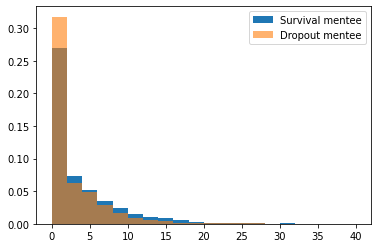

In [51]:
tp_sv_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Survival_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(BigGroup))]
tp_dp_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Dropout_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(BigGroup))]
print(np.median(tp_sv_big))
print(np.median(tp_dp_big))
plt.hist(tp_sv_big,label='Survival mentee',range=[0,40],bins=20,density=1)
plt.hist(tp_dp_big,label='Dropout mentee',range=[0,40],bins=20,density=1,alpha=0.6)
plt.legend()

非参数检验结果： MannwhitneyuResult(statistic=9174979.5, pvalue=3.2052994080290234e-23)


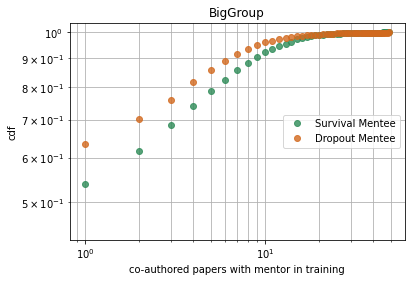

In [75]:
tp_sv_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Survival_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(BigGroup))]
tp_dp_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Dropout_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(BigGroup))]

print('非参数检验结果：',stats.mannwhitneyu(tp_sv_big,tp_dp_big,alternative='two-sided'))

results, edges = np.histogram(tp_sv_big, density=1,range=[0,50],bins=50)
binWidth = edges[1] - edges[0]

results1, edges1 = np.histogram(tp_dp_big, density=1,range=[0,50],bins=50)
binWidth1 = edges1[1] - edges1[0]

#计算累积概率密度分布
x0 = edges;y0 = results*binWidth
Y0 = []
tp = 0
for k in y0:
    tp+=k
    Y0.append(tp)
Y0 = np.array(Y0)
    
x1 = edges1
y1 = results1*binWidth1
Y1 = []
tp = 0
for k in y1:
    tp+=k
    Y1.append(tp)
Y1 = np.array(Y1)

plt.loglog(x0[0:len(x0)-1],Y0,label='Survival Mentee',color='seagreen',marker='o',ls='',alpha=0.8)
plt.loglog(x1[0:len(x1)-1],Y1,label='Dropout Mentee',color='chocolate',marker='o',ls='',alpha=0.8)
plt.legend(loc='center right')
plt.xlabel('co-authored papers with mentor in training')
plt.ylabel('cdf')
plt.title('BigGroup')
plt.grid(True,which="both", ls="-")

非参数检验结果： MannwhitneyuResult(statistic=13156524.0, pvalue=0.006665768955292269)


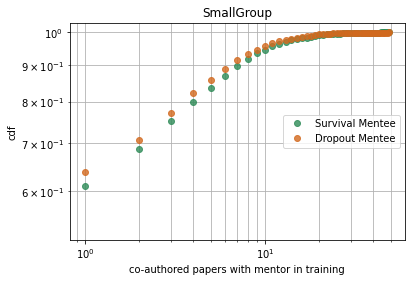

In [76]:
tp_sv_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Survival_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(SmallGroup))]
tp_dp_big = mto_mte_colla_df.CollaPubsOfWithMentor[(mto_mte_colla_df.Mentee.isin(Dropout_Mentee))
                                              &(mto_mte_colla_df.Mentee.isin(SmallGroup))]

print('非参数检验结果：',stats.mannwhitneyu(tp_sv_big,tp_dp_big,alternative='two-sided'))

results, edges = np.histogram(tp_sv_big, density=1,range=[0,50],bins=50)
binWidth = edges[1] - edges[0]

results1, edges1 = np.histogram(tp_dp_big, density=1,range=[0,50],bins=50)
binWidth1 = edges1[1] - edges1[0]

#计算累积概率密度分布
x0 = edges;y0 = results*binWidth
Y0 = []
tp = 0
for k in y0:
    tp+=k
    Y0.append(tp)
Y0 = np.array(Y0)
    
x1 = edges1
y1 = results1*binWidth1
Y1 = []
tp = 0
for k in y1:
    tp+=k
    Y1.append(tp)
Y1 = np.array(Y1)

plt.loglog(x0[0:len(x0)-1],Y0,label='Survival Mentee',color='seagreen',marker='o',ls='',alpha=0.8)
plt.loglog(x1[0:len(x1)-1],Y1,label='Dropout Mentee',color='chocolate',marker='o',ls='',alpha=0.8)
plt.legend(loc='center right')
plt.xlabel('co-authored papers with mentor in training')
plt.ylabel('cdf')
plt.title('SmallGroup')
plt.grid(True,which="both", ls="-")

##### 老师在培养学生期间发文量的区别

非参数检验结果： MannwhitneyuResult(statistic=60547819.0, pvalue=0.0)


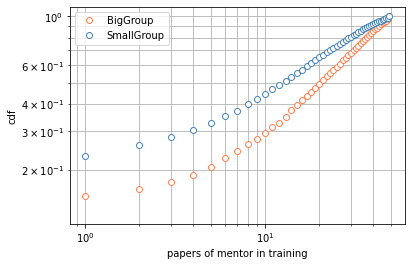

In [83]:
tp_sv_big = mto_mte_colla_df.PubsOfMentorInTraning[
                                              mto_mte_colla_df.Mentee.isin(BigGroup)]
tp_dp_big = mto_mte_colla_df.PubsOfMentorInTraning[
                                              mto_mte_colla_df.Mentee.isin(SmallGroup)]

print('非参数检验结果：',stats.mannwhitneyu(tp_sv_big,tp_dp_big,alternative='two-sided'))

results, edges = np.histogram(tp_sv_big, density=1,range=[0,50],bins=50)
binWidth = edges[1] - edges[0]

results1, edges1 = np.histogram(tp_dp_big, density=1,range=[0,50],bins=50)
binWidth1 = edges1[1] - edges1[0]

#计算累积概率密度分布
x0 = edges;y0 = results*binWidth
Y0 = []
tp = 0
for k in y0:
    tp+=k
    Y0.append(tp)
Y0 = np.array(Y0)
    
x1 = edges1
y1 = results1*binWidth1
Y1 = []
tp = 0
for k in y1:
    tp+=k
    Y1.append(tp)
Y1 = np.array(Y1)

plt.loglog(x0[0:len(x0)-1],Y0,label='BigGroup',color='coral',marker='o',ls='',alpha=1,markerfacecolor='white')
plt.loglog(x1[0:len(x1)-1],Y1,label='SmallGroup',color='steelblue',marker='o',ls='',alpha=1,markerfacecolor='white')
plt.legend(loc='upper left')
plt.xlabel('papers of mentor in training')
plt.ylabel('cdf')
plt.grid(True,which="both", ls="-")

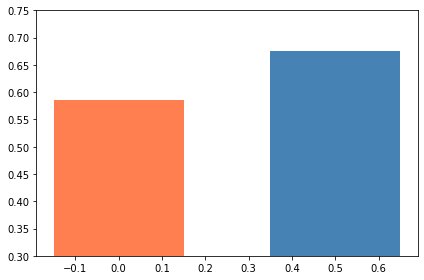

In [109]:
tp_big = mto_mte_colla_df.Mentee[mto_mte_colla_df.Mentee.isin(BigGroup)]
tp_small = mto_mte_colla_df.Mentee[mto_mte_colla_df.Mentee.isin(SmallGroup)]

tp_big_sv = mto_mte_colla_df.Mentee[(mto_mte_colla_df.Mentee.isin(BigGroup))
                                   &(mto_mte_colla_df.Mentee.isin(Survival_Mentee))]
tp_small_sv = mto_mte_colla_df.Mentee[mto_mte_colla_df.Mentee.isin(SmallGroup)
                                     &(mto_mte_colla_df.Mentee.isin(Survival_Mentee))]

sr_big = len(tp_big_sv)/len(tp_big)
sr_small = len(tp_small_sv)/len(tp_small)
x = [0,0.5]
y = [sr_big,sr_small]
plt.bar(x,y,color=['coral','steelblue'],width=0.3)
plt.ylim([0.3,0.75])
plt.tight_layout()
# plt.xlabel('papers of mentor in training')
# plt.ylabel('cdf')
# plt.grid(True,which="both", ls="-")